# Final Paper Code 


Josua Lutian & Wenxuan Li 
INF2178 

LINK: https://colab.research.google.com/drive/1J40LxGVu1HubBbCkT7zqoxTcifkhNh6v?usp=sharing

DATA CLEANING 

EDA
- Race 
- Gender
- Crime Type 
- Cohen's D 
- Power Curve Analysis
- T-test Effect Size
- ANOVA

ANCOVA 
- One-way ANCOVA

LOGISTIC REGRESSION
- Training Data
- Odds Ratio 
-  Confusion Matrix 
- Prediction Interval


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from tabulate import tabulate
import statsmodels.stats.api as sms


#for multiple comparison ttests
from scipy import stats
import statsmodels.stats.multicomp as mc

# for one-way anova and hsd
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# for two-way anova
import statsmodels.api as sm
from statsmodels.formula.api import ols  

#for power analysis

import scipy.stats
import statsmodels.stats.power as smp
import matplotlib.pyplot as plt

from math import sqrt
from statsmodels.stats.power import TTestIndPower

#for logistic regression
import statsmodels.formula.api as smf



# Data Cleaning (Original - Need To Change)

In [ ]:
url = "https://raw.githubusercontent.com/shionguha/inf2178-expdesignfordatascience-w23/main/project%20dataset/Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv"
dataset = pd.read_csv(url, delimiter = ",")


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65276 entries, 0 to 65275
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Arrest_Year                      65276 non-null  int64  
 1   Arrest_Month                     65276 non-null  object 
 2   EventID                          65276 non-null  int64  
 3   ArrestID                         64807 non-null  float64
 4   PersonID                         65276 non-null  int64  
 5   Perceived_Race                   65272 non-null  object 
 6   Sex                              65276 non-null  object 
 7   Age_group__at_arrest_            65252 non-null  object 
 8   Youth_at_arrest__under_18_years  65276 non-null  object 
 9   ArrestLocDiv                     65276 non-null  object 
 10  StripSearch                      65276 non-null  int64  
 11  Booked                           65276 non-null  int64  
 12  Occurrence_Categor

In [ ]:
dataset['Sex'].value_counts()

M    52650
F    12617
U        9
Name: Sex, dtype: int64

In [ ]:
df = dataset[['Arrest_Year','Perceived_Race','Sex','Age_group__at_arrest_',
              'Occurrence_Category','StripSearch',
              'Actions_at_arrest___Concealed_i',
              'Actions_at_arrest___Combative__',
              'Actions_at_arrest___Resisted__d',
              'Actions_at_arrest___Mental_inst',
              'Actions_at_arrest___Assaulted_o',
              'Actions_at_arrest___Cooperative']]

df.columns = ['Year','Race','Sex','Age','Crime_Type',
              'Strip', 'Concealed_Item',
              'Combative', 'Resisted', 'Mental' ,
              'Assaulted','Cooperative']


In [ ]:
# combine some levels of race
df['Race'] = df['Race'].replace('East/Southeast Asian', 'Asian')
df['Race'] = df['Race'].replace('South Asian', 'Asian')
df['Race'] = df['Race'].replace('Middle-Eastern', 'Asian')
df['Race'] = df['Race'].replace('Unknown or Legacy', 'Unknown')

<ipython-input-7-58169d182261>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Race'] = df['Race'].replace('East/Southeast Asian', 'Asian')
<ipython-input-7-58169d182261>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Race'] = df['Race'].replace('South Asian', 'Asian')
<ipython-input-7-58169d182261>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa


- Crime_Type (Violent & Non-Violent) 
- Action_at_Arrest (Violent & Non-Violent) 

### Crime_Type

In [ ]:
#combine some levels of Crime_Type that may have similar meanings
#combining Other and Property crimes together 
df['Crime_Type'] = df['Crime_Type'].replace('Assault', 'Violent')
df['Crime_Type'] = df['Crime_Type'].replace('Assault & Other crimes against persons', 'Violent')
df['Crime_Type'] = df['Crime_Type'].replace('Robbery & Theft', 'Non-Violent')
df['Crime_Type'] = df['Crime_Type'].replace('Warrant', 'Non-Violent')
df['Crime_Type'] = df['Crime_Type'].replace('FTA/FTC/Compliance Check/Parollee', 'Non-Violent')
df['Crime_Type'] = df['Crime_Type'].replace('Police Category - Administrative', 'Non-Violent')
df['Crime_Type'] = df['Crime_Type'].replace('FTA/FTC, Compliance Check & Parollee', 'Non-Violent')
df['Crime_Type'] = df['Crime_Type'].replace('Robbery/Theft', 'Non-Violent')
df['Crime_Type'] = df['Crime_Type'].replace('Drug Related', 'Non-Violent') 
df['Crime_Type'] = df['Crime_Type'].replace('Other Statute & Other Incident Type', 'Non-Violent')
df['Crime_Type'] = df['Crime_Type'].replace('Vehicle Related (inc. Impaired)', 'Non-Violent')
df['Crime_Type'] = df['Crime_Type'].replace('Other Offence', 'Violent')
df['Crime_Type'] = df['Crime_Type'].replace('Mischief & Fraud', 'Non-Violent')
df['Crime_Type'] = df['Crime_Type'].replace('Impaired', 'Non-Violent')
df['Crime_Type'] = df['Crime_Type'].replace('Harassment/Threatening', 'Violent')
df['Crime_Type'] = df['Crime_Type'].replace('Mischief', 'Non-Violent')
df['Crime_Type'] = df['Crime_Type'].replace('Harassment & Threatening', 'Violent')
df['Crime_Type'] = df['Crime_Type'].replace('Weapons', 'Violent')
df['Crime_Type'] = df['Crime_Type'].replace('Weapons & Homicide', 'Violent')
df['Crime_Type'] = df['Crime_Type'].replace('Other Statute', 'Non-Violent')
df['Crime_Type'] = df['Crime_Type'].replace('Break & Enter', 'Non-Violent')
df['Crime_Type'] = df['Crime_Type'].replace('Break and Enter', 'Non-Violent')
df['Crime_Type'] = df['Crime_Type'].replace('Sexual Related Crime', 'Violent')
df['Crime_Type'] = df['Crime_Type'].replace('Sexual Related Crimes & Crimes Against Children', 'Violent')
df['Crime_Type'] = df['Crime_Type'].replace('Vehicle Related', 'Non-Violent')
df['Crime_Type'] = df['Crime_Type'].replace('LLA', 'Non-Violent')
df['Crime_Type'] = df['Crime_Type'].replace('Police Category - Incident', 'Non-Violent')
df['Crime_Type'] = df['Crime_Type'].replace('Fraud', 'Non-Violent')
df['Crime_Type'] = df['Crime_Type'].replace('Mental Health', 'Non-Violent')
df['Crime_Type'] = df['Crime_Type'].replace('Homicide', 'Violent')
df['Crime_Type'] = df['Crime_Type'].replace('Crimes against Children', 'Violent')

<ipython-input-8-0ba2876c1b49>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Crime_Type'] = df['Crime_Type'].replace('Assault', 'Violent')
<ipython-input-8-0ba2876c1b49>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Crime_Type'] = df['Crime_Type'].replace('Assault & Other crimes against persons', 'Violent')
<ipython-input-8-0ba2876c1b49>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [ ]:
df['Crime_Type'].value_counts()

Non-Violent    41577
Violent        23534
Name: Crime_Type, dtype: int64

## Violence Prop

In [ ]:
df = df[['Year','Race','Sex','Age','Crime_Type', 'Strip']]
df_res=df.groupby(['Year','Race','Sex','Age','Crime_Type'],as_index=False).count()
df_res.columns = [['Year','Race','Sex','Age','Crime_Type','Count']]
df_res




,Year,Race,Sex,Age,Crime_Type,Count
0,2020,Asian,F,Aged 17 years and younger,Non-Violent,56
1,2020,Asian,F,Aged 17 years and younger,Violent,6
2,2020,Asian,F,Aged 18 to 24 years,Non-Violent,109
3,2020,Asian,F,Aged 18 to 24 years,Violent,69
4,2020,Asian,F,Aged 25 to 34 years,Non-Violent,94
...,...,...,...,...,...,...
332,2021,White,M,Aged 55 to 64 years,Non-Violent,723
333,2021,White,M,Aged 55 to 64 years,Violent,365
334,2021,White,M,Aged 65 years and older,Non-Violent,165
335,2021,White,M,Aged 65 years and older,Violent,129


In [ ]:
df1=df[df.Strip == 1]
a=df1.groupby(['Year','Race','Sex','Age','Crime_Type'],as_index=False).count()
df2=df[df.Strip == 0]
b=df2.groupby(['Year','Race','Sex','Age','Crime_Type'],as_index=False).count()
c=df.groupby(['Year','Race','Sex','Age','Crime_Type'],as_index=False).count()

In [ ]:
d=pd.merge(a, b, how="outer", on=['Year','Race','Sex','Age','Crime_Type'])
df_res = pd.merge(c,d, how="outer", on=['Year','Race','Sex','Age','Crime_Type'])
df_res.columns = ['Year','Race','Sex','Age','Crime_Type','Count','StripYesCount','StripNoCount']
df_res['StripYesCount'] = df_res['StripYesCount'].fillna(0)
df_res['StripNoCount'] = df_res['StripNoCount'].fillna(0)
df_res['Strip_prop'] = df_res['StripYesCount']/df_res['Count']


df_res= df_res.loc[df_res["Sex"] != "U"].dropna()
df_res

,Year,Race,Sex,Age,Crime_Type,Count,StripYesCount,StripNoCount,Strip_prop
0,2020,Asian,F,Aged 17 years and younger,Non-Violent,56,2.0,54.0,0.035714
1,2020,Asian,F,Aged 17 years and younger,Violent,6,0.0,6.0,0.000000
2,2020,Asian,F,Aged 18 to 24 years,Non-Violent,109,9.0,100.0,0.082569
3,2020,Asian,F,Aged 18 to 24 years,Violent,69,8.0,61.0,0.115942
4,2020,Asian,F,Aged 25 to 34 years,Non-Violent,94,8.0,86.0,0.085106
...,...,...,...,...,...,...,...,...,...
331,2021,White,M,Aged 45 to 54 years,Violent,636,7.0,629.0,0.011006
332,2021,White,M,Aged 55 to 64 years,Non-Violent,723,8.0,715.0,0.011065
333,2021,White,M,Aged 55 to 64 years,Violent,365,3.0,362.0,0.008219
334,2021,White,M,Aged 65 years and older,Non-Violent,165,2.0,163.0,0.012121


In [ ]:
#adding Race continuous var
df4=df_res[df_res.Crime_Type == "Violent"][['Year','Race','Sex','Age','Strip_prop','Crime_Type']]
df4["Count"] = df4.groupby(['Year','Sex','Age', 'Strip_prop', 'Crime_Type'],as_index=False).transform("count")
df5=df_res[df_res.Crime_Type == "Non-Violent"][['Year','Race','Sex','Age','Strip_prop', 'Crime_Type']]
df5['Count'] =df5.groupby(['Year','Sex','Age','Strip_prop','Crime_Type'],as_index=False).transform("count")
l = df_res[['Year','Race','Sex','Age','Strip_prop', 'Crime_Type']]
l['Count']=l.groupby(['Year','Sex','Age','Strip_prop','Crime_Type'],as_index=False).transform("count")

<ipython-input-13-71f70d25d8b3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  l['Count']=l.groupby(['Year','Sex','Age','Strip_prop','Crime_Type'],as_index=False).transform("count")


In [ ]:
m=pd.merge(df4, df5, how="outer", on=['Year','Race','Sex','Age','Strip_prop','Crime_Type'])
m.columns = ['Year','Race','Sex','Age','Strip_prop','Crime_Type','Violent','Non-Violent']

m['Violent'] = m['Violent'].fillna(0)
m['Non-Violent'] = m['Non-Violent'].fillna(0)
#m['Violent_prop'] = m['Violent']/df_res['Count']
df_final = m.copy()
df_final= df_final.loc[df_final["Sex"] != "U"]
df_final

,Year,Race,Sex,Age,Strip_prop,Crime_Type,Violent,Non-Violent
0,2020,Asian,F,Aged 17 years and younger,0.000000,Violent,3.0,0.0
1,2020,Asian,F,Aged 18 to 24 years,0.115942,Violent,1.0,0.0
2,2020,Asian,F,Aged 25 to 34 years,0.133333,Violent,1.0,0.0
3,2020,Asian,F,Aged 35 to 44 years,0.074627,Violent,1.0,0.0
4,2020,Asian,F,Aged 45 to 54 years,0.023810,Violent,1.0,0.0
...,...,...,...,...,...,...,...,...
325,2021,White,M,Aged 25 to 34 years,0.027027,Non-Violent,0.0,1.0
326,2021,White,M,Aged 35 to 44 years,0.035971,Non-Violent,0.0,1.0
327,2021,White,M,Aged 45 to 54 years,0.011494,Non-Violent,0.0,1.0
328,2021,White,M,Aged 55 to 64 years,0.011065,Non-Violent,0.0,1.0


In [ ]:
df_merge = pd.merge(df_final, df_res, how="outer", on=['Year','Race','Sex','Age','Strip_prop','Crime_Type'])

In [ ]:
df_merge = df_merge.dropna()

In [ ]:
df_merge["Violent_prop"] = df_merge['Violent']/df_merge['Count']
df_final = df_merge

In [ ]:
df_final

,Year,Race,Sex,Age,Strip_prop,Crime_Type,Violent,Non-Violent,Count,StripYesCount,StripNoCount,Violent_prop
0,2020,Asian,F,Aged 17 years and younger,0.000000,Violent,3.0,0.0,6,0.0,6.0,0.500000
1,2020,Asian,F,Aged 18 to 24 years,0.115942,Violent,1.0,0.0,69,8.0,61.0,0.014493
2,2020,Asian,F,Aged 25 to 34 years,0.133333,Violent,1.0,0.0,75,10.0,65.0,0.013333
3,2020,Asian,F,Aged 35 to 44 years,0.074627,Violent,1.0,0.0,67,5.0,62.0,0.014925
4,2020,Asian,F,Aged 45 to 54 years,0.023810,Violent,1.0,0.0,42,1.0,41.0,0.023810
...,...,...,...,...,...,...,...,...,...,...,...,...
325,2021,White,M,Aged 25 to 34 years,0.027027,Non-Violent,0.0,1.0,2109,57.0,2052.0,0.000000
326,2021,White,M,Aged 35 to 44 years,0.035971,Non-Violent,0.0,1.0,2224,80.0,2144.0,0.000000
327,2021,White,M,Aged 45 to 54 years,0.011494,Non-Violent,0.0,1.0,1305,15.0,1290.0,0.000000
328,2021,White,M,Aged 55 to 64 years,0.011065,Non-Violent,0.0,1.0,723,8.0,715.0,0.000000


In [ ]:
# #This code is to make a binary Strip column 
df_final["Strip"] = df_final["Strip_prop"].map (lambda x: 1 if x >0 else 0)

In [ ]:
df_final

,Year,Race,Sex,Age,Strip_prop,Crime_Type,Violent,Non-Violent,Count,StripYesCount,StripNoCount,Violent_prop,Strip
0,2020,Asian,F,Aged 17 years and younger,0.000000,Violent,3.0,0.0,6,0.0,6.0,0.500000,0
1,2020,Asian,F,Aged 18 to 24 years,0.115942,Violent,1.0,0.0,69,8.0,61.0,0.014493,1
2,2020,Asian,F,Aged 25 to 34 years,0.133333,Violent,1.0,0.0,75,10.0,65.0,0.013333,1
3,2020,Asian,F,Aged 35 to 44 years,0.074627,Violent,1.0,0.0,67,5.0,62.0,0.014925,1
4,2020,Asian,F,Aged 45 to 54 years,0.023810,Violent,1.0,0.0,42,1.0,41.0,0.023810,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,2021,White,M,Aged 25 to 34 years,0.027027,Non-Violent,0.0,1.0,2109,57.0,2052.0,0.000000,1
326,2021,White,M,Aged 35 to 44 years,0.035971,Non-Violent,0.0,1.0,2224,80.0,2144.0,0.000000,1
327,2021,White,M,Aged 45 to 54 years,0.011494,Non-Violent,0.0,1.0,1305,15.0,1290.0,0.000000,1
328,2021,White,M,Aged 55 to 64 years,0.011065,Non-Violent,0.0,1.0,723,8.0,715.0,0.000000,1


# EDA

##Gender

In [ ]:
df_final['Sex'].unique()

array(['F', 'M'], dtype=object)

In [ ]:
Male = df_final[df_final['Sex'] == 'M']

Female = df_final [df_final ['Sex'] == 'F']
gender_stat = [Female, Male]
std_prop_gender = []
mean_prop_gender = []
sum_gender = []
count_gender = []

for i in range(len (df_final['Sex'].unique() )): 
  std_prop_gender.append(gender_stat[i]['Strip_prop'].std())
  mean_prop_gender.append (gender_stat[i]['Strip_prop'].mean() )
  sum_gender.append (gender_stat[i]['StripYesCount'].sum())
  count_gender.append (gender_stat[i]['Count'].sum())

#combine them together to become a dataframe 
df_strip_gender = pd.DataFrame ({'Gender': df_final['Sex'].unique(), 'Mean Proportion': mean_prop_gender, 
                              "Std Proportion": std_prop_gender,
                              'Strip Searches per Gender': sum_gender, 'Total Arrests': count_gender})

print(tabulate(df_strip_gender.round(3), headers='keys', tablefmt='psql'))

+----+----------+-------------------+------------------+-----------------------------+-----------------+
|    | Gender   |   Mean Proportion |   Std Proportion |   Strip Searches per Gender |   Total Arrests |
|----+----------+-------------------+------------------+-----------------------------+-----------------|
|  0 | F        |             0.076 |            0.128 |                        1283 |           12575 |
|  1 | M        |             0.106 |            0.121 |                        6516 |           52499 |
+----+----------+-------------------+------------------+-----------------------------+-----------------+


Text(0.5, 0.98, 'Proportion of Strip Searches by Gender')

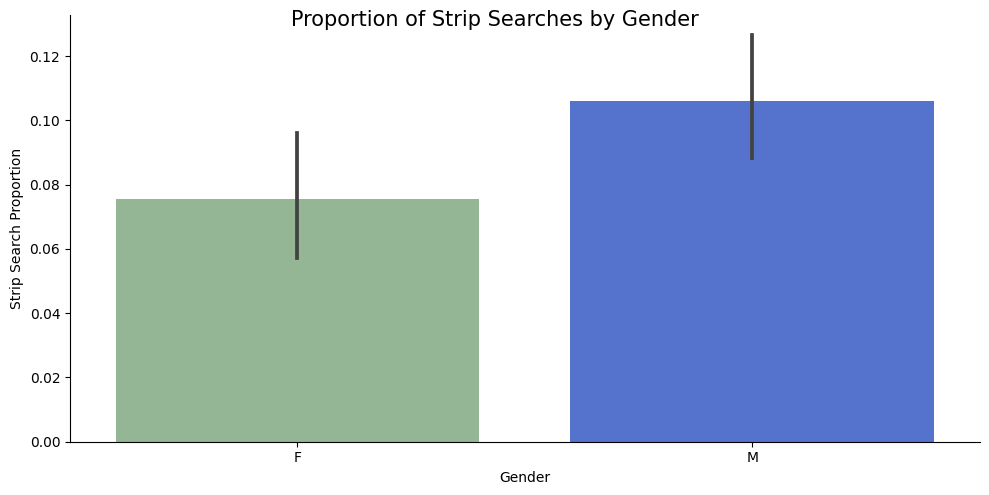

In [ ]:
genplot1 = sns.catplot(data=df_final, kind="bar", x="Sex", 
                    y="Strip_prop", height = 5, aspect = 2,   
                    palette=sns.color_palette (['darkseagreen','royalblue'] ) )
genplot1.set_axis_labels('Gender', 'Strip Search Proportion')
genplot1.fig.suptitle('Proportion of Strip Searches by Gender', fontsize = 15)


In [ ]:
std_prop_gender = []
mean_prop_gender = []
sum_gender = []
count_gender = []

for i in range(len (df_final['Sex'].unique() )): 
  std_prop_gender.append(gender_stat[i]['Violent_prop'].std())
  mean_prop_gender.append (gender_stat[i]['Violent_prop'].mean() )
  sum_gender.append (gender_stat[i]['Violent'].sum())
  count_gender.append (gender_stat[i]['Count'].sum())

#combine them together to become a dataframe 
df_strip_gender = pd.DataFrame ({'Gender': df_final['Sex'].unique(), 'Mean Proportion': mean_prop_gender, 
                              "Std Proportion": std_prop_gender,
                              'Violent Crimes per Gender': sum_gender, 'Total Arrests': count_gender})

print(tabulate(df_strip_gender.round(3), headers='keys', tablefmt='psql'))

+----+----------+-------------------+------------------+-----------------------------+-----------------+
|    | Gender   |   Mean Proportion |   Std Proportion |   Violent Crimes per Gender |   Total Arrests |
|----+----------+-------------------+------------------+-----------------------------+-----------------|
|  0 | F        |             0.335 |            1.061 |                         217 |           12575 |
|  1 | M        |             0.037 |            0.13  |                         129 |           52499 |
+----+----------+-------------------+------------------+-----------------------------+-----------------+


Text(0.5, 0.98, 'Proportion of Violent Crimes by Gender')

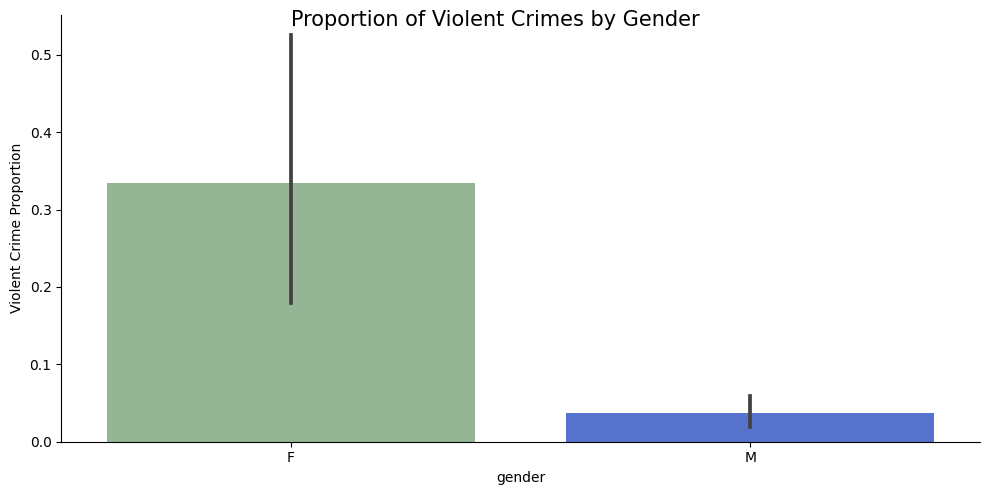

In [ ]:
genplot1 = sns.catplot(data=df_final, kind="bar", x="Sex", 
                    y="Violent_prop", height = 5, aspect = 2,   
                    palette=sns.color_palette (['darkseagreen','royalblue'] ) )
genplot1.set_axis_labels('gender', 'Violent Crime Proportion')
genplot1.fig.suptitle('Proportion of Violent Crimes by Gender', fontsize = 15)


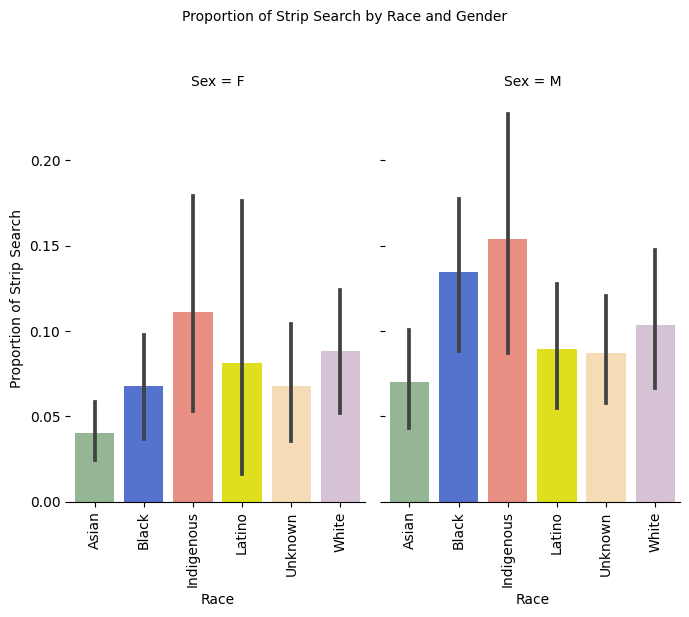

In [ ]:
#grouped by race showing crime type 
genplot2 = sns.catplot (kind = 'bar', data = df_final, x = 'Race',
                    y = 'Strip_prop', col= 'Sex',                      
                    height = 5 ,aspect = 0.7, 
                    palette=sns.color_palette (['darkseagreen','royalblue', 'salmon', 'yellow','navajowhite', 'thistle']))


genplot2.set_axis_labels('Race', 'Proportion of Strip Search')
genplot2.set_xticklabels(rotation=90)
genplot2.fig.suptitle('Proportion of Strip Search by Race and Gender', fontsize = 10,y=1.1)
#genplot2.set_titles("{col_name}")
genplot2.despine(left=True)

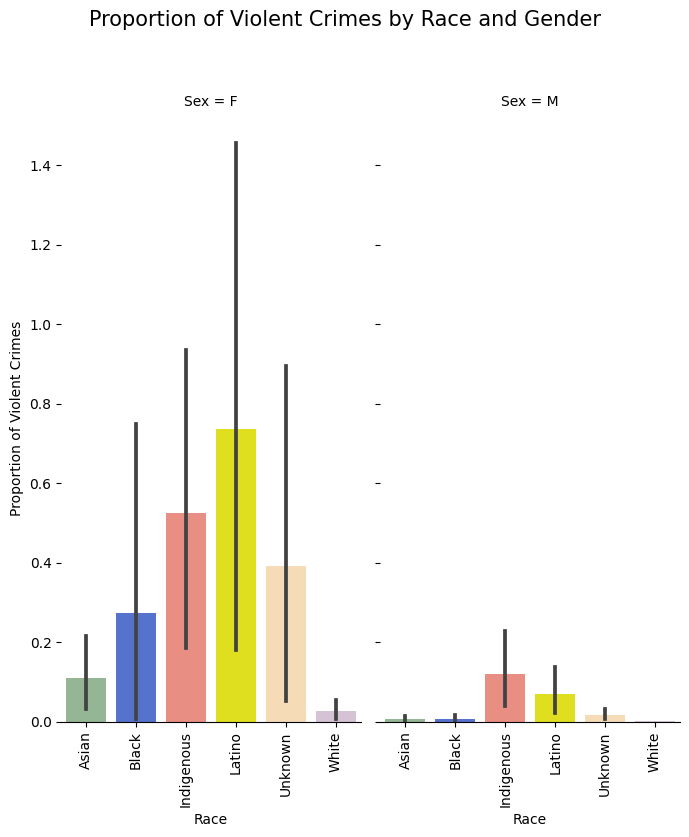

In [ ]:
genplot3 = sns.catplot (kind = 'bar', data = df_final, x = 'Race',
                    y = 'Violent_prop', col= 'Sex',                      
                    height = 7 ,aspect = 0.5, 
                    palette=sns.color_palette (['darkseagreen','royalblue', 'salmon', 'yellow','navajowhite', 'thistle']))


genplot3.set_axis_labels('Race','Proportion of Violent Crimes')
genplot3.set_xticklabels(rotation=90)
genplot3.fig.suptitle('Proportion of Violent Crimes by Race and Gender', fontsize = 15,y=1.1)
#genplot3.set_titles("{col_name}")
genplot3.despine(left=True)


## Power Analysis

In [ ]:

#code for Cohen's D 

#function to calculate the pooled standard deviation of 2 samples
def pooled_standard_deviation(sample1,sample2):
    #calculate the sample size
    n1, n2 = len(sample1), len(sample2)
    #calculate the variances
    var1, var2 = np.var(sample1, ddof=1), np.var(sample2, ddof=1)
    #calculate the pooled standard deviation
    numerator = ((n1-1) * var1) + ((n2-1) * var2)
    denominator = n1+n2-2
    return np.sqrt(numerator/denominator)

# function to calculate Cohen's d for independent samples
def Cohens_d(sample1, sample2):
    u1, u2 = np.mean(sample1), np.mean(sample2)
    #print (u1)
    s_pooled = pooled_standard_deviation(sample1, sample2)
    return ((u1 - u2) / s_pooled)

In [ ]:
#Power Analysis for Strip Searches 
Male = df_final[df_final['Sex'] == 'M']
Male_Strip = Male['Strip_prop']

Female1 = df_final [df_final ['Sex'] == 'F']
Female_Strip= Female1["Strip_prop"]

In [ ]:
#Power Analysis for Strip Searches   
effect_size = Cohens_d(Male_Strip,Female_Strip)
alpha = 0.05
power = 0.8
ratio_ =len(Male_Strip)/len(Female_Strip) #NB: ratio = nobs2/nobs1
print('Effect size (Cohen\'s D) for Strip Searched Individuals',effect_size)

Effect size (Cohen's D) for Strip Searched Individuals 0.24555185481555905


In [ ]:
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size of nobs1: %.3f' % sample_size, 'needed for Female_Strip') 
print('Actual size of Female_Strip:', len(Female_Strip))
nobs2 =ratio_*sample_size
print('Sample Size of nobs2: %.3f' % nobs2, 'needed for Male_Strip')
print('Actual size of Male_Strip:', len(Male_Strip))

Sample Size of nobs1: 258.180 needed for Female_Strip
Actual size of Female_Strip: 163
Sample Size of nobs2: 264.516 needed for Male_Strip
Actual size of Male_Strip: 167


In [ ]:
from statsmodels.stats.power import TTestPower
from statsmodels.stats.power import FTestAnovaPower


power = TTestPower()
n_test = power.solve_power(nobs=258.10, effect_size = 0.25, power = None, alpha = 0.05)
print('Power: {:.3f}'.format(n_test))

Power: 0.979


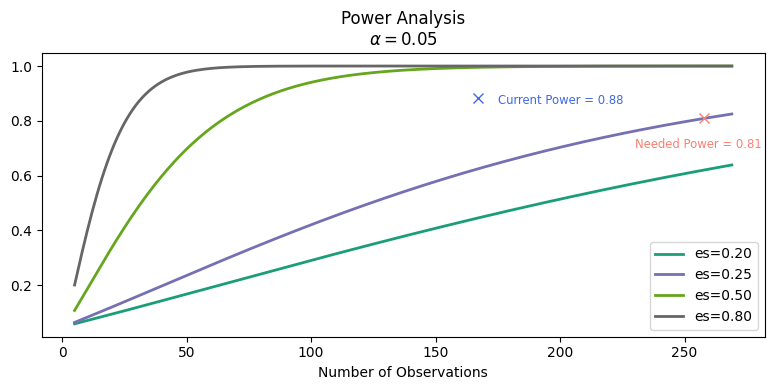

In [ ]:
#Power Curve 
effect_sizes = np.array([0.2, 0.25, 0.5, 0.8])
sample_sizes = np.array(range(5, 270))
  
# plot power curves


plt.rcParams["figure.figsize"] = [8, 4]
plt.rcParams["figure.autolayout"] = True
x = [258]
y = [0.81]
#plt.plot(x, y, marker="o", markersize=20, markeredgecolor="red", markerfacecolor="green")

ax = analysis.plot_power(dep_var='nobs', nobs=sample_sizes,
               effect_size=effect_sizes, alpha = 0.05,
               title = 'Power Analysis' + '\n'+ r'$\alpha = 0.05$')
plt.plot(x, y, marker="x", markersize=7, 
         markeredgecolor = 'salmon', markerfacecolor="salmon")

plt.plot([167], [0.883], marker="x", markersize=7, 
         markeredgecolor = 'royalblue', markerfacecolor="royalblue")

plt.text(175,0.86,'Current Power = 0.88', size = 'small', color = 'royalblue')

plt.text(230,0.70,'Needed Power = 0.81', size = 'small', color = 'salmon')


plt.show()



## Race

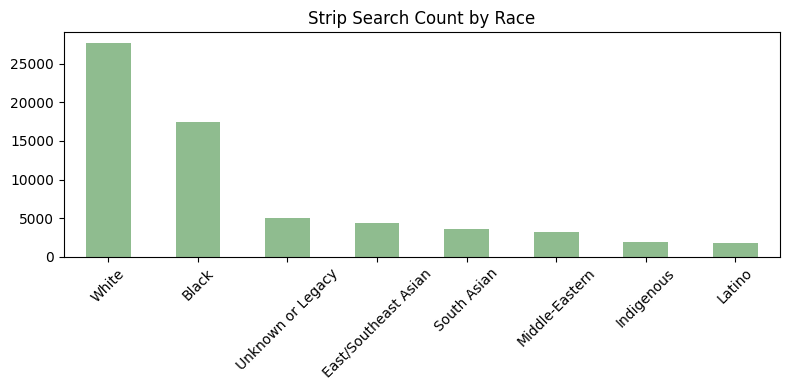

In [ ]:
plot1 = dataset['Perceived_Race'].value_counts().plot(kind ='bar', title = 'Strip Search Count by Race', rot= 45, color = 'darkseagreen')
#plot1.set_xlabel("Race")plot1.set_ylabel("Strip Search Count")

Text(0.5, 0.98, 'Strip Search Counts by Race')

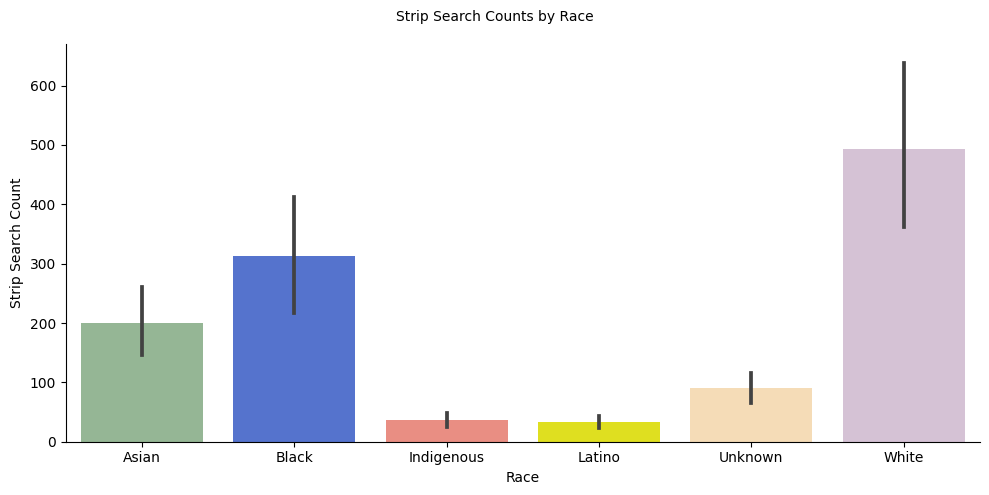

In [ ]:
plot2 = sns.catplot(data=df_final, kind="bar", x="Race", 
                    y="Count", height = 5, aspect = 2,   
                    palette=sns.color_palette (['darkseagreen','royalblue', 'salmon', 'yellow','navajowhite', 'thistle'] ) )
plot2.set_axis_labels('Race', 'Strip Search Count')
plot2.fig.suptitle('Strip Search Counts by Race', fontsize = 10)


Text(0.5, 0.98, 'Proportion of Strip Search by Race')

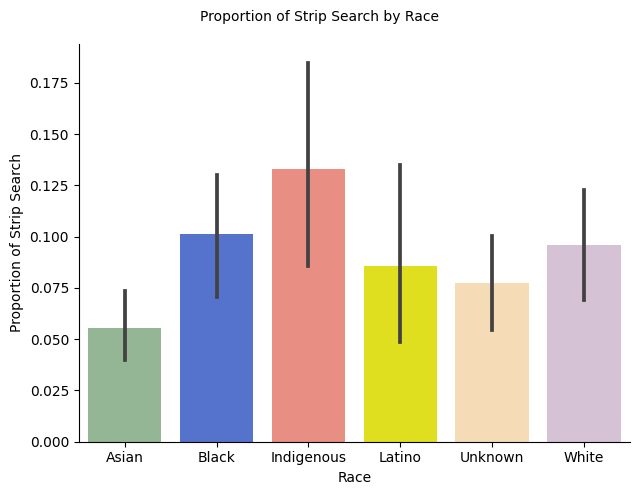

In [ ]:
plot2 = sns.catplot(data=df_final, kind="bar", x="Race", 
                    y="Strip_prop", height = 5, aspect = 1.3, 
                    palette=sns.color_palette (['darkseagreen','royalblue', 'salmon', 'yellow','navajowhite', 'thistle'] ))
plot2.set_axis_labels('Race', 'Proportion of Strip Search')
plot2.fig.suptitle('Proportion of Strip Search by Race', fontsize = 10)

In [ ]:
#counts means and std
White = df_res[(df_res['Race'] == 'White')]
Unknown = df_res[(df_res['Race'] == 'Unknown')]
Black = df_res[(df_res['Race'] == 'Black')]
Latino = df_res[(df_res['Race'] == 'Latino')]
Indigenous = df_res[(df_res['Race'] == 'Indigenous')]
Asian = df_res[(df_res['Race'] == 'Asian')]

race_stat = [Asian, Black, Indigenous, Latino, Unknown, White]
std_race = []
mean_race = []

for i in range (len (df_res['Race'].unique())): 
  std_race.append(race_stat[i]['Count'].std())
  mean_race.append (race_stat[i]['Count'].mean() )

#combine them together to become a dataframe 
df_race = pd.DataFrame ({'Race': df_res['Race'].unique(), 'Mean': mean_race, "Std": std_race})

print(tabulate(df_race.round(2), headers='keys', tablefmt='psql'))


+----+------------+--------+--------+
|    | Race       |   Mean |    Std |
|----+------------+--------+--------|
|  0 | Asian      | 200.57 | 229.24 |
|  1 | Black      | 312.27 | 385.17 |
|  2 | Indigenous |  36.34 |  44.11 |
|  3 | Latino     |  33.17 |  40.05 |
|  4 | Unknown    |  90.02 |  99.91 |
|  5 | White      | 493.39 | 558.72 |
+----+------------+--------+--------+


In [ ]:
#proportion means and std

race_stat = [Asian, Black, Indigenous, Latino, Unknown, White]
std_prop_race = []
mean_prop_race = []
sum_race = []
count_race = []

for i in range (len (df_res['Race'].unique())): 
  std_prop_race.append(race_stat[i]['Strip_prop'].std())
  mean_prop_race.append (race_stat[i]['Strip_prop'].mean() )
  sum_race.append (race_stat[i]['StripYesCount'].sum())
  count_race.append (race_stat[i]['Count'].sum())

#combine them together to become a dataframe 
df_prop_race = pd.DataFrame ({'Race': df_res['Race'].unique(), 'Mean Proportion': mean_prop_race, 
                              "Std Proportion": std_prop_race,
                              'Strip Searches per Race': sum_race, 'Total Arrests': count_race})

print(tabulate(df_prop_race.round(3), headers='keys', tablefmt='psql'))

+----+------------+-------------------+------------------+---------------------------+-----------------+
|    | Race       |   Mean Proportion |   Std Proportion |   Strip Searches per Race |   Total Arrests |
|----+------------+-------------------+------------------+---------------------------+-----------------|
|  0 | Asian      |             0.055 |            0.064 |                       826 |           11232 |
|  1 | Black      |             0.101 |            0.112 |                      2434 |           17487 |
|  2 | Indigenous |             0.133 |            0.178 |                       306 |            1926 |
|  3 | Latino     |             0.086 |            0.165 |                       132 |            1758 |
|  4 | Unknown    |             0.077 |            0.091 |                       535 |            5041 |
|  5 | White      |             0.096 |            0.102 |                      3566 |           27630 |
+----+------------+-------------------+----------------

## Crime Type

Text(0, 0.5, 'Strip Search Count')

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


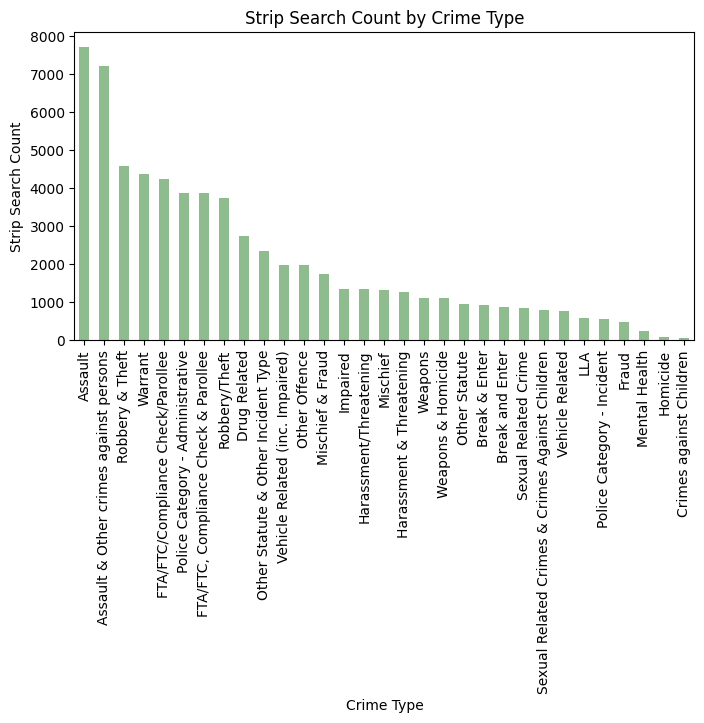

In [ ]:
plot5 = dataset['Occurrence_Category'].value_counts().plot(kind= 'bar', rot = 90, title = 'Strip Search Count by Crime Type',color = 'darkseagreen')
plot5.set_xlabel("Crime Type")
plot5.set_ylabel("Strip Search Count")

Text(0.5, 0.98, 'Proportion of Strip Search by Crime Type')

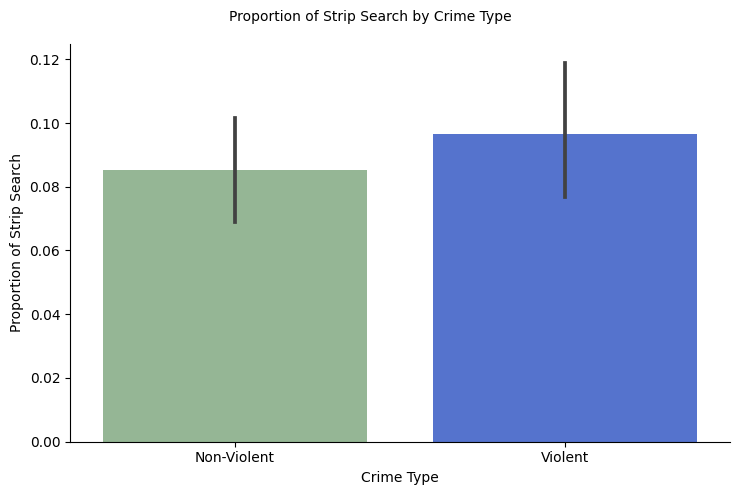

In [ ]:
plot3= sns.catplot(data=df_res, kind="bar", x="Crime_Type", y="Strip_prop", height = 5, 
                   aspect = 1.5, 
                   palette=sns.color_palette (['darkseagreen','royalblue', 'salmon'] ) )

plot3.set_axis_labels('Crime Type', 'Proportion of Strip Search')
plot3.fig.suptitle('Proportion of Strip Search by Crime Type', fontsize = 10)

In [ ]:
df_final['Crime_Type'].value_counts()

Violent        166
Non-Violent    164
Name: Crime_Type, dtype: int64

In [ ]:
# #mean and standard deviations

Nonviolent = df_final[(df_final['Crime_Type'] == 'Non-Violent')]
Violent = df_final[(df_final['Crime_Type'] == 'Violent')]

crime_stat = [Violent,Nonviolent]
std_crime = []
mean_crime = []
sum_crime = []
count_crime = []
for i in range (len (df_final['Crime_Type'].unique())): 
  std_crime.append(crime_stat[i]['Strip_prop'].std())
  mean_crime.append (crime_stat[i]['Strip_prop'].mean())
  sum_crime.append (crime_stat[i]['StripYesCount'].sum())
  count_crime.append (crime_stat[i]['Count'].sum())

#combine them together to become a dataframe 

df_crime = pd.DataFrame ({'Crime Type': df_final['Crime_Type'].unique(), 
                          'Mean': mean_crime, "Std": std_crime,
                          'Total Strip Searches': sum_crime,
                          'Total Arrests:': count_crime})

print(tabulate(df_crime.round(3), headers='keys', tablefmt='psql'))


+----+--------------+--------+-------+------------------------+------------------+
|    | Crime Type   |   Mean |   Std |   Total Strip Searches |   Total Arrests: |
|----+--------------+--------+-------+------------------------+------------------|
|  0 | Violent      |  0.097 | 0.142 |                   2684 |            23528 |
|  1 | Non-Violent  |  0.085 | 0.107 |                   5115 |            41546 |
+----+--------------+--------+-------+------------------------+------------------+


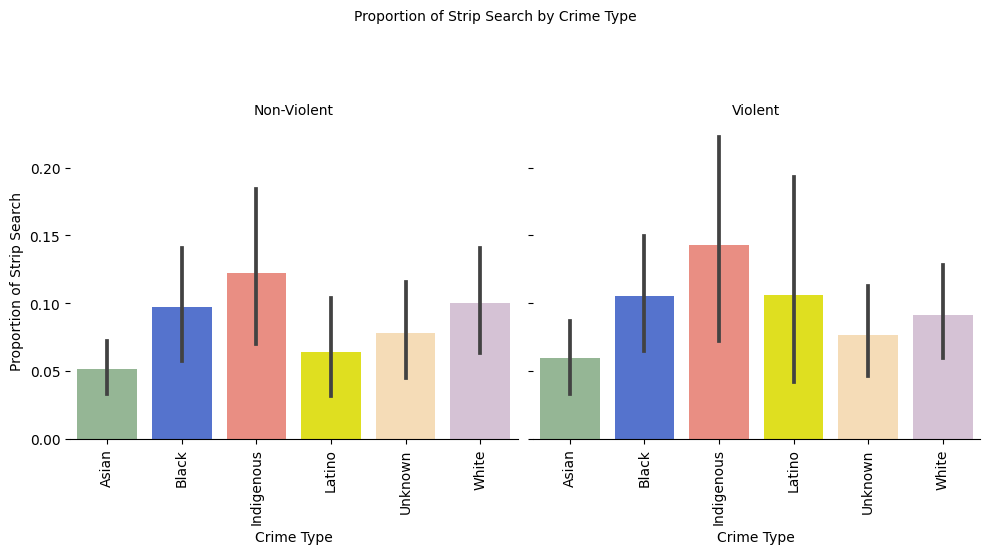

In [ ]:
#grouped by race showing crime type 
plot4 = sns.catplot (kind = 'bar', data = df_res, x = 'Race',
                    y = 'Strip_prop', col= 'Crime_Type',                      
                    height = 5 ,aspect = 1, 
                    palette=sns.color_palette (['darkseagreen','royalblue', 'salmon', 'yellow','navajowhite', 'thistle']))


plot4.set_axis_labels('Crime Type', 'Proportion of Strip Search')
plot4.set_xticklabels(rotation=90)
plot4.fig.suptitle('Proportion of Strip Search by Crime Type', fontsize = 10,y=1.1)
plot4.set_titles("{col_name}")
plot4.despine(left=True)

### Histogram for `Count`

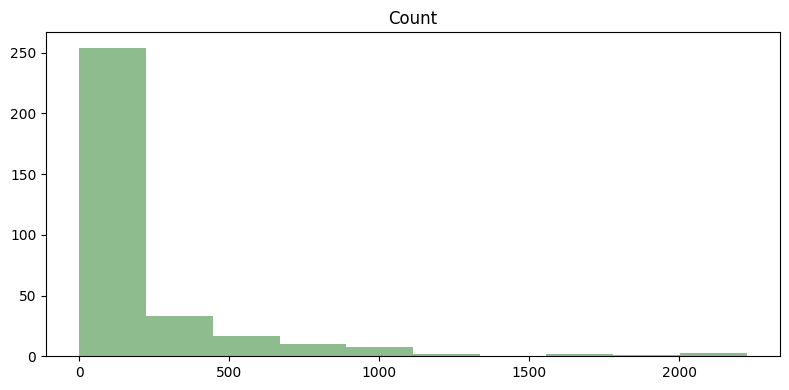

In [ ]:
#plt.hist(df_res['Count'])
#plt.show() 

ax = df_res.hist(column = 'Count', grid = False, color = 'darkseagreen' )


## T-tests

In [ ]:
#Race Shapiro-Wilk; Test for Normalization 

shapiro_table = []
for i in range (len (df_final['Sex'].unique())):
  temp = stats.shapiro (gender_stat[i]['Strip_prop'])
  sig = "Accept"
  if temp[1] < 0.05: 
    sig = "Reject"
  shapiro_table.append ([temp[0], temp[1], sig])

shapiro_table = pd.DataFrame (shapiro_table)
shapiro_table.insert(0, 'Gender',df_final['Sex'].unique())
shapiro_table.columns = ['Gender','Statistic', 'P-Value', 'H0']
print ("Test of Data Normalization for Race Groups:","\n",tabulate (shapiro_table, headers = 'keys', tablefmt='psql'))

Test of Data Normalization for Race Groups: 
 +----+----------+-------------+-------------+--------+
|    | Gender   |   Statistic |     P-Value | H0     |
|----+----------+-------------+-------------+--------|
|  0 | F        |    0.626841 | 1.08127e-18 | Reject |
|  1 | M        |    0.824658 | 6.93856e-13 | Reject |
+----+----------+-------------+-------------+--------+


In [ ]:
#fix this adda violence prop stat in the gender_stat

shapiro_table = []
for i in range (len (df_final['Sex'].unique())):
  temp = stats.shapiro (gender_stat[i]['Violent_prop'])
  sig = "Accept"
  if temp[1] < 0.05: 
    sig = "Reject"
  shapiro_table.append ([temp[0], temp[1], sig])

shapiro_table = pd.DataFrame (shapiro_table)
shapiro_table.insert(0, 'Gender',df_final['Sex'].unique())
shapiro_table.columns = ['Gender','Statistic', 'P-Value', 'H0']
print ("Test of Data Normalization for Race Groups:","\n",tabulate (shapiro_table, headers = 'keys', tablefmt='psql'))

Test of Data Normalization for Race Groups: 
 +----+----------+-------------+-------------+--------+
|    | Gender   |   Statistic |     P-Value | H0     |
|----+----------+-------------+-------------+--------|
|  0 | F        |    0.347731 | 6.2244e-24  | Reject |
|  1 | M        |    0.302852 | 7.13416e-25 | Reject |
+----+----------+-------------+-------------+--------+


In [ ]:
#Gender T-Test
gender_comp = mc.MultiComparison(df_final['Strip_prop'],df_final['Sex'])
summary, p_val, p_val_corr =gender_comp.allpairtest(stats.ttest_ind, method= "bonf")

gender_comp = mc.MultiComparison(df_final['Violent_prop'],df_final['Sex'])
summary1, p_val, p_val_corr =gender_comp.allpairtest(stats.ttest_ind, method= "bonf")

print (summary, "\n" , summary1)

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.05, alphacBonf=0.050
group1 group2   stat   pval  pval_corr reject
---------------------------------------------
     F      M -2.2302 0.0264    0.0264   True
--------------------------------------------- 
 Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.05, alphacBonf=0.050
group1 group2  stat   pval  pval_corr reject
--------------------------------------------
     F      M 3.6051 0.0004    0.0004   True
--------------------------------------------


results - gender does  influence strip search proportions but there is no significant difference between genders in violent crimes 

In [ ]:
race_comp = mc.MultiComparison(df_final['Strip_prop'],df_final['Race'])
summary3, p_val, p_val_corr =race_comp.allpairtest(stats.ttest_ind, method= "bonf")

race_comp = mc.MultiComparison(df_final['Violent_prop'],df_final['Race'])
summary4, p_val, p_val_corr =race_comp.allpairtest(stats.ttest_ind, method= "bonf")

print (summary3, "\n + \n" , summary4)

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.00, alphacBonf=0.003
  group1     group2     stat   pval  pval_corr reject
-----------------------------------------------------
     Asian      Black -2.6746 0.0086    0.1293  False
     Asian Indigenous -3.0609 0.0028    0.0418   True
     Asian     Latino -1.2799 0.2034       1.0  False
     Asian    Unknown -1.4944 0.1379       1.0  False
     Asian      White -2.5192 0.0132     0.198  False
     Black Indigenous -1.1151 0.2673       1.0  False
     Black     Latino  0.5872 0.5583       1.0  False
     Black    Unknown  1.2433 0.2164       1.0  False
     Black      White  0.2684 0.7889       1.0  False
Indigenous     Latino   1.421 0.1583       1.0  False
Indigenous    Unknown  2.0668 0.0412    0.6175  False
Indigenous      White  1.3397 0.1832       1.0  False
    Latino    Unknown  0.3229 0.7474       1.0  False
    Latino      White -0.3953 0.6934       1.0  False
   Unknown      White -1.0119 0.3138       

In [ ]:
race_comp = mc.MultiComparison(df_final['Strip_prop'],df_final['Crime_Type'])
summary3, p_val, p_val_corr =race_comp.allpairtest(stats.ttest_ind, method= "bonf")

print (summary3)

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.05, alphacBonf=0.050
   group1    group2   stat   pval  pval_corr reject
---------------------------------------------------
Non-Violent Violent -0.8236 0.4107    0.4107  False
---------------------------------------------------


## ANOVAS

### One-Way

In [ ]:
## ANOVA on Race vs. Strip_prop
a = df_final[df_final.Race=='Black'].Strip_prop
b = df_final[df_final.Race=="White"].Strip_prop
c = df_final[df_final.Race=="Asian"].Strip_prop

d = df_final[df_final.Race=="Latino"].Strip_prop
e = df_final[df_final.Race=="Indigenous"].Strip_prop
f = df_final[df_final.Race=="Unknown"].Strip_prop
# perform one-way ANOVA
f_oneway(a,b,c,d,e,f)

F_onewayResult(statistic=2.3831913637254605, pvalue=0.03828878797615851)

In [ ]:
# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=df_res['Strip_prop'],
                          groups=df_res['Race'],
                          alpha=0.05)

#display results
print(tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1     group2   meandiff p-adj   lower  upper  reject
-----------------------------------------------------------
     Asian      Black   0.0461 0.3663 -0.0212 0.1133  False
     Asian Indigenous   0.0776 0.0154  0.0094 0.1458   True
     Asian     Latino   0.0303 0.7992 -0.0379 0.0985  False
     Asian    Unknown   0.0222 0.9347 -0.0451 0.0894  False
     Asian      White   0.0406 0.5122 -0.0267 0.1079  False
     Black Indigenous   0.0316 0.7699 -0.0366 0.0998  False
     Black     Latino  -0.0157 0.9859  -0.084 0.0525  False
     Black    Unknown  -0.0239 0.9115 -0.0912 0.0434  False
     Black      White  -0.0054 0.9999 -0.0727 0.0618  False
Indigenous     Latino  -0.0473 0.3667 -0.1165 0.0218  False
Indigenous    Unknown  -0.0555 0.1845 -0.1237 0.0127  False
Indigenous      White   -0.037 0.6286 -0.1052 0.0312  False
    Latino    Unknown  -0.0082 0.9994 -0.0764 0.0601  False
    Latino      White   0.0103 0.9981 -0

In [ ]:
#Crime Type
a = df_final[df_final.Crime_Type=='Violent'].Strip_prop
b = df_final[df_final.Crime_Type=="Non-Violent"].Strip_prop
f_oneway(a,b,)

F_onewayResult(statistic=0.6783902308979802, pvalue=0.4107400645578517)

In [ ]:
#Gender
a = df_final[df_final.Sex=='M'].Strip_prop
b = df_final[df_final.Sex=='F'].Strip_prop
f_oneway(a,b)

F_onewayResult(statistic=4.973665498645148, pvalue=0.026412296256868806)

In [ ]:
# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=df_final['Strip_prop'],
                          groups=df_final['Sex'],
                          alpha=0.05)

#display results
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     F      M   0.0306 0.0264 0.0036 0.0576   True
--------------------------------------------------


### Two-Way

In [ ]:
## two-way anova
#Race x Crime Type -> Significant 
model = ols('Strip_prop ~ C(Race) + C(Crime_Type) + C(Race):C(Crime_Type)', data=df_final).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Race),0.183314,5.0,2.348878,0.040909
C(Crime_Type),0.010281,1.0,0.658681,0.417633
C(Race):C(Crime_Type),0.021672,5.0,0.277688,0.925193
Residual,4.963537,318.0,NaN,NaN


Main effects -> only race
Thre is not significant interaction




In [ ]:
#Race x Gender -> Significant 

model = ols('Strip_prop ~ C(Race) + C(Sex) + C(Race):C(Sex)', data=df_final).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Race),0.182981,5.0,2.381582,0.038450
C(Sex),0.076621,1.0,4.986288,0.026245
C(Race):C(Sex),0.032377,5.0,0.421403,0.833732
Residual,4.886491,318.0,NaN,NaN


Main effects -> both race and gender, no interaction

In [ ]:
#Crime_Type x Gender -> Not Significant 
model = ols('Strip_prop ~ C(Crime_Type) + C(Sex) + C(Crime_Type):C(Sex)', data=df_final).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Crime_Type),0.011405,1.0,0.730719,0.393278
C(Sex),0.078077,1.0,5.002624,0.025985
C(Crime_Type):C(Sex),0.002487,1.0,0.159330,0.690036
Residual,5.087958,326.0,NaN,NaN


Only race, and no interaction 

## Interaction Plots

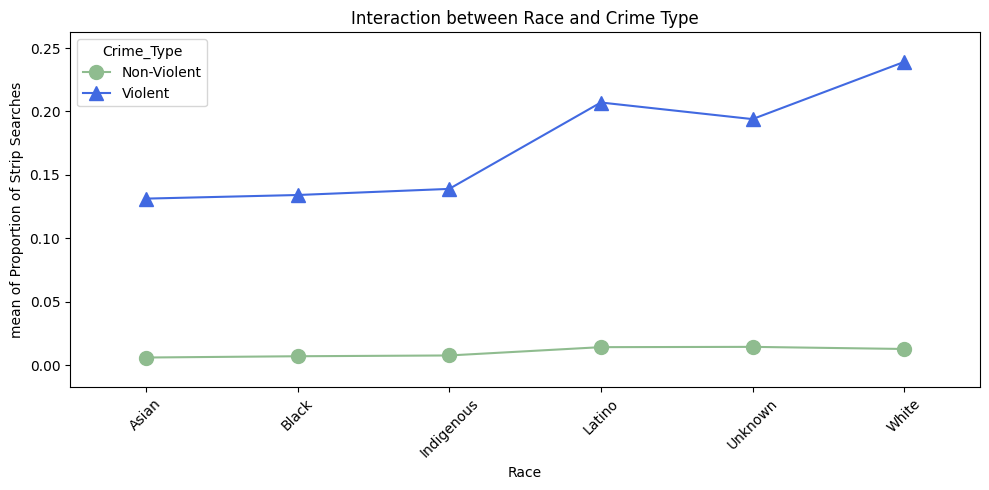

In [ ]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))
 
plt.xticks (rotation = 45)
plt.title("Interaction between Race and Crime Type")

fig = interaction_plot(x=df_final['Race'], trace=df_final['Crime_Type'], response=df_res['Strip_prop'], 
                       colors=['darkseagreen','royalblue'], 
                       ylabel = 'Proportion of Strip Searches', markers=["o", "^"],ax = ax, ms = 10)

  

plt.show()

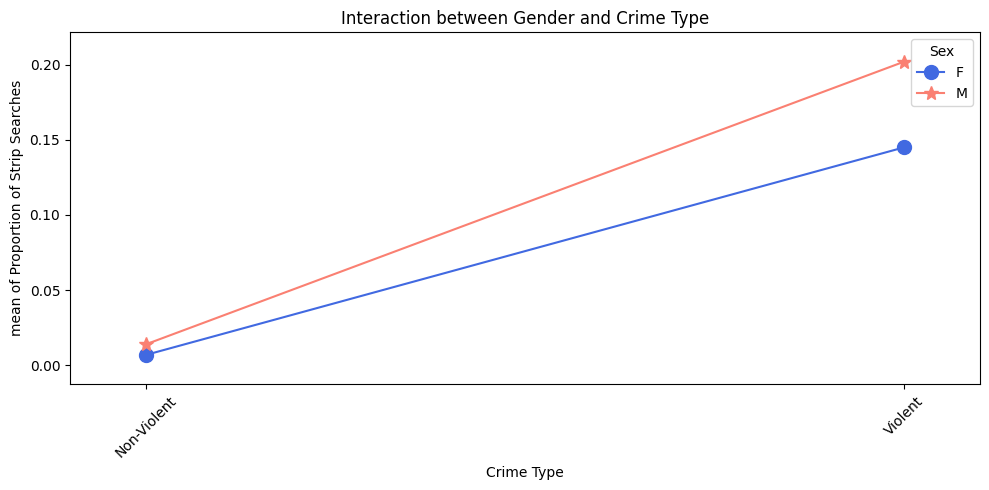

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
 
plt.xticks (rotation = 45)
plt.title("Interaction between Gender and Crime Type")

fig = interaction_plot(x=df_final['Crime_Type'], trace=df_res['Sex'], response=df_res['Strip_prop'], 
                       colors=['royalblue', 'salmon'], 
                       ylabel = 'Proportion of Strip Searches', markers=["o", "*"],ax = ax, ms = 10, xlabel = 'Crime Type')

  

plt.show()

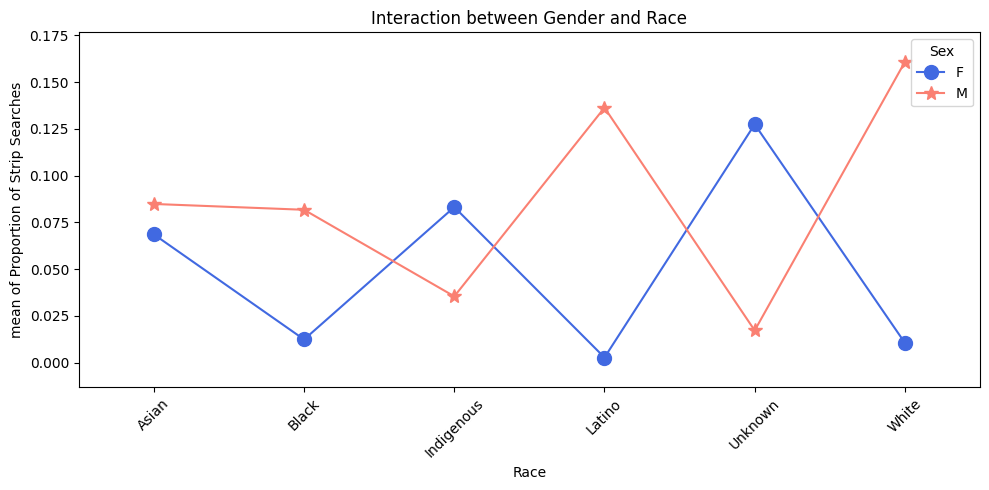

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
 
plt.xticks (rotation = 45)
plt.title("Interaction between Gender and Race")

fig = interaction_plot(x=df_final['Race'], trace=df_res['Sex'], response=df_res['Strip_prop'], 
                       colors=['royalblue', 'salmon'], 
                       ylabel = 'Proportion of Strip Searches', markers=["o", "*"],ax = ax, ms = 10)

  

plt.show()

# ANCOVA


In [ ]:
!pip install pingouin #if not installed on your virtual env then pip install 

import pandas as pd
from pingouin import ancova
pd.options.display.max_columns = None

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=86cf16edb38d9cf3df7e978458b9d59b8429455a187a2b4eea72bb835516bf95
  Stored in directory: /root/.cache/pip/wheels/04/bb/0d/2d02ec45f29c48d6192476bfb59c5a0e64b605e7212374dd15
Successfully built littleutils


In [ ]:
ancova(data=df_final, dv='Strip_prop', covar='Violent_prop', between='Race')

,Source,SS,DF,F,p-unc,np2
0,Race,0.202791,5,2.670318,0.022071,0.039695
1,Violent_prop,0.089606,1,5.899600,0.015690,0.017937
2,Residual,4.905883,323,NaN,NaN,NaN


In [ ]:
ancova(data=df_final, dv='Strip_prop', covar='Violent_prop', between='Sex')

,Source,SS,DF,F,p-unc,np2
0,Sex,0.053236,1,3.443480,0.064401,0.010421
1,Violent_prop,0.046412,1,3.002044,0.084102,0.009097
2,Residual,5.055437,327,NaN,NaN,NaN


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
race_code = le.fit_transform(df_final['Race'])
sex_code = le.fit_transform(df_final['Sex'])
crime_code = le.fit_transform(df_final['Crime_Type'])
df_final['RaceCode'] = race_code
df_final['SexCode'] = sex_code #0 = F, 1 = Male
df_final['CrimeCode'] = crime_code #0 = Non-Violent, 1 = Violent
df_final["Strip"] = df_final["StripYesCount"].map (lambda x: 1 if x >0 else 0)

In [ ]:
import pandas as pd 
import statsmodels.api as sm 
from statsmodels.formula.api import ols 

model1 = ols('Strip_prop ~ RaceCode + SexCode', data=df_final).fit() 
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:             Strip_prop   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     2.673
Date:                Sun, 16 Apr 2023   Prob (F-statistic):             0.0706
Time:                        21:32:14   Log-Likelihood:                 219.91
No. Observations:                 330   AIC:                            -433.8
Df Residuals:                     327   BIC:                            -422.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0694      0.014      4.969      0.0

In [ ]:
model2 = ols('Violent_prop ~ RaceCode + SexCode', data=df_final).fit() 
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:           Violent_prop   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     6.480
Date:                Sun, 16 Apr 2023   Prob (F-statistic):            0.00174
Time:                        21:32:14   Log-Likelihood:                -372.89
No. Observations:                 330   AIC:                             751.8
Df Residuals:                     327   BIC:                             763.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3320      0.084      3.945      0.0

In [ ]:
model3 = ols('Strip_prop ~ Crime_Type + SexCode', data=df_final).fit() 
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:             Strip_prop   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     2.851
Date:                Sun, 16 Apr 2023   Prob (F-statistic):             0.0592
Time:                        21:32:14   Log-Likelihood:                 220.09
No. Observations:                 330   AIC:                            -434.2
Df Residuals:                     327   BIC:                            -422.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.06

In [ ]:
model4 = ols('Violent_prop ~ Crime_Type + SexCode', data=df_final).fit() 
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:           Violent_prop   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     17.02
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           9.30e-08
Time:                        21:32:14   Log-Likelihood:                -362.96
No. Observations:                 330   AIC:                             731.9
Df Residuals:                     327   BIC:                             743.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.15

# Logistic Regression

In [ ]:
from sklearn.utils.extmath import randomized_range_finder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = df_final [['RaceCode', 'SexCode', 'CrimeCode']]
y = df_final[['Strip']]

#splitting the dataset 
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 123)
model5 = LogisticRegression()

#training the dataset 
trainingdata = pd.concat([X_train,y_train], axis = 1)
print(trainingdata)

model1 = smf.logit('Strip ~ RaceCode + SexCode + CrimeCode', data=trainingdata).fit()
print(model1.summary())


     RaceCode  SexCode  CrimeCode  Strip
79          5        1          1      1
250         0        0          0      1
19          1        0          1      1
29          2        0          1      1
161         5        1          1      1
..        ...      ...        ...    ...
83          0        0          1      0
17          1        0          1      1
230         4        1          0      1
98          1        0          1      1
322         5        0          0      0

[264 rows x 4 columns]
Optimization terminated successfully.
         Current function value: 0.598620
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  Strip   No. Observations:                  264
Model:                          Logit   Df Residuals:                      260
Method:                           MLE   Df Model:                            3
Date:                Sun, 16 Apr 2023   Pseudo R-squ.:            

In [ ]:
#calculating odds ratio 
odds_ratio = np.exp(model1.params)
print(odds_ratio)

Intercept    1.079658
RaceCode     1.083594
SexCode      3.115601
CrimeCode    0.814149
dtype: float64


In [ ]:
params = model1.params
conf = model1.conf_int()
conf['OR'] = params
conf.columns = ["Lower CI", "Upper CI", "OR"]
np.exp(conf)

,Lower CI,Upper CI,OR
Intercept,0.603851,1.930378,1.079658
RaceCode,0.926372,1.267498,1.083594
SexCode,1.816792,5.342919,3.115601
CrimeCode,0.477421,1.388372,0.814149


In [ ]:
#Assessing the Model 
pred1 = model1.predict(X_test)
prediction_1 = list(map(round, pred1))

score = accuracy_score(y_test,prediction_1)
print(score)

pred1
#prediction_1

0.7272727272727273


159    0.803588
203    0.797966
310    0.822620
31     0.507899
55     0.547894
         ...   
33     0.507899
226    0.598153
188    0.784714
72     0.567694
201    0.797966
Length: 66, dtype: float64

[[ 1 17]
 [ 1 47]]


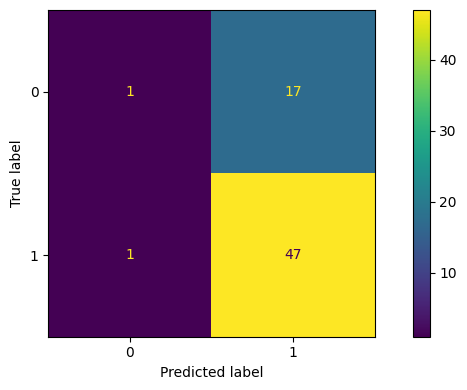

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test,prediction_1)
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

Precision = TP

In [ ]:
precision = cm[1,1]/(cm[1,1]+cm[0,1]) #TP/(TP + FP)
recall = cm[1,1]/(cm[1,1]+cm[1,0]) #TP/(TP + FN)

print (precision *100, recall *100 )

73.4375 97.91666666666666


## Prediction Interval

In [ ]:
#Prediction Interval 

X_train_ = sm.add_constant(X_train)
OLS = sm.OLS(y_train,X_train_).fit() 
print(OLS.summary())

# model2 = ols('Strip ~ RaceCode + SexCode + CrimeCode', data=trainingdata).fit()
# print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Strip   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     6.971
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           0.000158
Time:                        21:32:15   Log-Likelihood:                -165.85
No. Observations:                 264   AIC:                             339.7
Df Residuals:                     260   BIC:                             354.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5221      0.064      8.189      0.0

In [ ]:
#Get the mean prediction, confidence interval boundaries, prediction interval boundaries\
X_test_ = sm.add_constant(X_test)
intervals = OLS.get_prediction(X_test_).summary_frame(alpha=0.05)
intervals.head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
159,0.806752,0.062843,0.683006,0.930498,-0.101598,1.715102
203,0.799175,0.048923,0.702840,0.895511,-0.105848,1.704198
310,0.832555,0.054432,0.725371,0.939739,-0.073687,1.738797
31,0.512956,0.048555,0.417346,0.608567,-0.391990,1.417903
55,0.546336,0.054613,0.438795,0.653877,-0.359948,1.452620


In [ ]:
df_assess = OLS.get_prediction(X_test_).summary_frame(alpha=0.1)[['obs_ci_lower', 'obs_ci_upper']]
df_assess
     

,obs_ci_lower,obs_ci_upper
159,0.045276,1.568228
203,0.040488,1.557862
310,0.072846,1.592264
31,-0.245666,1.271579
55,-0.213408,1.306081
...,...,...
33,-0.245666,1.271579
226,-0.171506,1.349164
188,0.022826,1.542145
72,-0.198759,1.324811


In [ ]:
#examine what percentage of target values in the test data were within the prediction intervals:
ols_correct = np.mean(y_test['Strip'].between(df_assess['obs_ci_lower'], df_assess['obs_ci_upper']))
print(f"{ols_correct:.2%} of the prediction intervals contain true target.")

98.48% of the prediction intervals contain true target.


In [ ]:
mean_ci = [intervals['mean_ci_lower'].mean(), intervals['mean_ci_upper'].mean()]

mean_ci = [intervals['mean_ci_lower'].mean(), intervals['mean_ci_upper'].mean()]

mean_pred = [intervals['obs_ci_lower'].mean(), intervals['obs_ci_upper'].mean()]

mean_pred = [intervals['obs_ci_lower'].mean(), intervals['obs_ci_upper'].mean()]

print ("Mean CI: ", mean_ci)

print ("Mean Pred: ", mean_pred)

Mean CI:  [0.5492322670565081, 0.7750263089364607]
Mean Pred:  [-0.24489360481434563, 1.5691521808073146]


### Prediction Interval Scatterplot


###  Scatterplot


[Text(0.5, 1.0, 'Prediction Interval for Race'),
 Text(0.5, 0, 'Race'),
 Text(0, 0.5, 'Strip Search')]

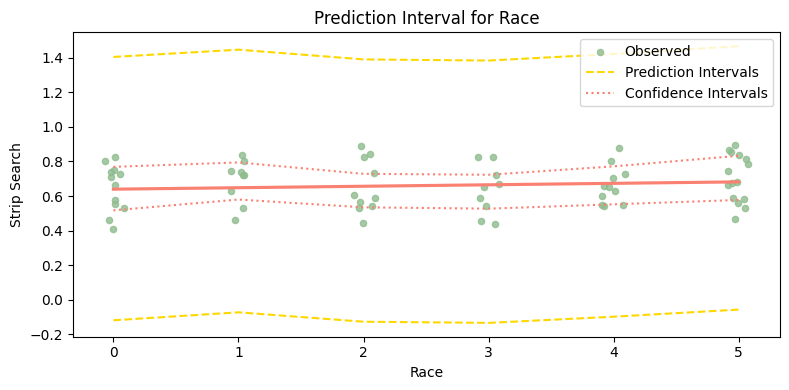

In [ ]:
#Race Plot
mainplot = sns.regplot (data = X_test_, x = 'RaceCode', y = intervals['mean'], 
             y_jitter = 0.1, x_jitter = 0.1, color = 'salmon',
             scatter_kws = {'color': 'darkseagreen', 's': 20}, ci = None,
             label = 'Observed')

#Prediction Intervals
sns.lineplot(x = X_test_['RaceCode'], y= df_assess['obs_ci_lower'], 
             errorbar = None, color = 'gold',  linestyle='--', 
             label = "Prediction Intervals")

sns.lineplot(x = X_test_['RaceCode'], y= df_assess['obs_ci_upper'], 
             errorbar = None, color = 'gold',  linestyle='--')

#Confidence Intervals 
sns.lineplot(x = X_test_['RaceCode'], y= intervals['mean_ci_lower'], 
             errorbar = None, color = 'salmon',  linestyle='dotted',
             label = "Confidence Intervals")

sns.lineplot(x = X_test_['RaceCode'], y= intervals['mean_ci_upper'], 
             errorbar = None, color = 'salmon',  linestyle='dotted')

mainplot.set(title = 'Prediction Interval for Race', xlabel = "Race", ylabel = "Strip Search")


[Text(0.5, 1.0, 'Prediction Interval for Gender'),
 Text(0.5, 0, 'Gender'),
 Text(0, 0.5, 'Strip Search')]

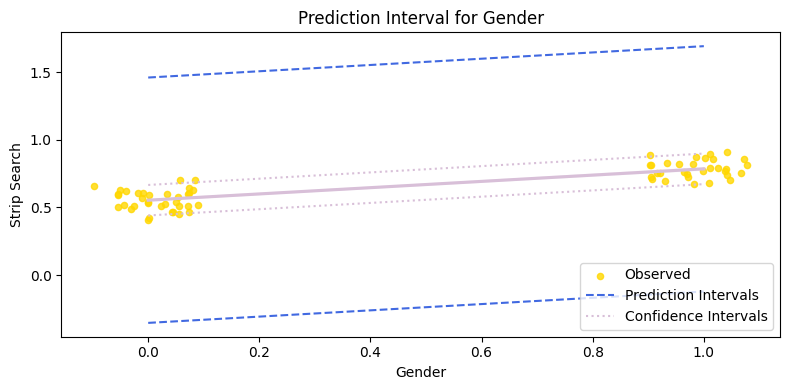

In [ ]:
#Gender Plot
mainplot = sns.regplot (data = X_test, x = 'SexCode', y = intervals['mean'],
             y_jitter = 0.1, x_jitter = 0.1, color = 'thistle',
             scatter_kws = {'color': 'gold', 's': 20}, label = 'Observed')

#Prediction Intervals
sns.lineplot(x = X_test_['SexCode'], y= intervals['obs_ci_lower'], 
             errorbar = None, color = 'royalblue',  linestyle='--', 
             label = "Prediction Intervals")

sns.lineplot(x = X_test_['SexCode'], y= intervals['obs_ci_upper'],
             errorbar = None, color = 'royalblue', linestyle='--')

#Confidence Intervals
sns.lineplot(x = X_test_['SexCode'], y= intervals['mean_ci_lower'],
             errorbar = None, color = 'thistle',  linestyle='dotted',
             label = 'Confidence Intervals')

sns.lineplot(x = X_test_['SexCode'], y= intervals['mean_ci_upper'], 
             errorbar = None, color = 'thistle',  linestyle='dotted')

mainplot.legend (loc = 'lower right')
mainplot.set(title = 'Prediction Interval for Gender',xlabel = "Gender", ylabel = "Strip Search")



Mean CI:  [0.5492322670565081, 0.7750263089364607]


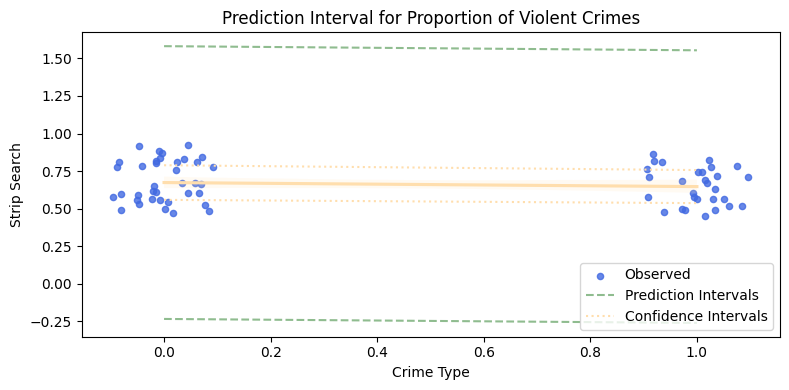

In [ ]:
mainplot = sns.regplot (data = X_test, x = 'CrimeCode', y = intervals['mean'], 
             y_jitter = 0.1, x_jitter = 0.1, color = 'navajowhite',
             scatter_kws = {'color': 'royalblue', 's': 20}, label = "Observed")

#Prediction Intervals
sns.lineplot(x = X_test_['CrimeCode'], y= intervals['obs_ci_lower'], 
             errorbar = None, color = 'darkseagreen',  linestyle='--')

sns.lineplot(x = X_test_['CrimeCode'], y= intervals['obs_ci_upper'], 
             errorbar = None, color = 'darkseagreen',  linestyle='--', 
             label = "Prediction Intervals")

#Confidence Intervals
sns.lineplot(x = X_test_['CrimeCode'], y= intervals['mean_ci_lower'], 
             errorbar = None, color = 'navajowhite',  linestyle='dotted', 
             label = "Confidence Intervals")

sns.lineplot(x = X_test_['CrimeCode'], y= intervals['mean_ci_upper'], 
             errorbar = None, color = 'navajowhite',  linestyle='dotted')

mainplot.legend (loc = 'lower right')
mainplot.set(title = 'Prediction Interval for Proportion of Violent Crimes',xlabel = "Crime Type", ylabel = "Strip Search")

mean_ci = [intervals['mean_ci_lower'].mean(), intervals['mean_ci_upper'].mean()]

print ("Mean CI: ", mean_ci)